In [6]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import glob

read files

In [7]:
web_pages_dir = '../../personalisation_project/TVNZ/*/*'
files = glob.glob(web_pages_dir)

scraping

In [85]:
def fetch_meta(soup):
    image = soup.select_one('.Hero-image-inner img').attrs['src'].strip()
    content_container = soup.select_one('.Hero-container-content-inner')
    title = content_container.select_one('.Hero-title a').text.strip()
    description = content_container.select_one('.Hero-description').text.strip()

    return {
        'title': title,
        'description': description,
        'image_url': image
    }


def fetch_episodes(soup):
    episodes = soup.select('.Episodes-list')

    data = []

    for episode in episodes:
        image_dump = episode.select_one('img').attrs['src'].strip()

        title = episode.select_one('.Episode-title-label').text.strip()
        description_container = episode.select_one('.Episode-description')
        rating = description_container.select_one('.Episode-rating').text.strip()
        description = description_container.text.strip()
        description = description[len(rating):].strip()

        data.append({
            'title':title,
            'rating': rating,
            'description': description,
            'image_dump': image_dump
        })

    return data



documentary/proof.html

CPU times: user 25.1 ms, sys: 981 µs, total: 26.1 ms
Wall time: 25.6 ms

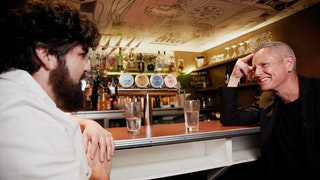

In [89]:
%%time

data = []

for idx in range(len(files)):
    file = files[idx]
    splitted = file.split('/')
    category = splitted[4]
    file_path = '/'.join(splitted[4:])

    print(file_path)

    soup = BeautifulSoup(open(file), 'html.parser')

    content = fetch_meta(soup)
    content['category'] = category
    episodes = fetch_episodes(soup)

    print(episodes[0]['image_dump'])

    break